# CMIコンペ ベースライン前処理

## Step1: 必要なライブラリのインポートとデータ読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

print("ライブラリ読み込み完了")

ライブラリ読み込み完了


In [2]:
# データ読み込み
train = pd.read_csv('../data/train.csv')
demographics = pd.read_csv('../data/train_demographics.csv')
test = pd.read_csv('../data/test.csv')
test_demographics = pd.read_csv('../data/test_demographics.csv')

print(f"Train shape: {train.shape}")
print(f"Demographics shape: {demographics.shape}")
print(f"Test shape: {test.shape}")
print(f"Test demographics shape: {test_demographics.shape}")

# 先頭表示
print("\n=== Train Data ===")
display(train.head())
print("\n=== Demographics Data ===")
display(demographics.head())

Train shape: (574945, 341)
Demographics shape: (81, 8)
Test shape: (107, 336)
Test demographics shape: (2, 8)

=== Train Data ===


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0



=== Demographics Data ===


,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0


## Step2: データの基本情報確認

In [3]:
# カラム情報確認
print("=== Train Data Columns ===")
print(f"Total columns: {len(train.columns)}")
print("\nFirst 10 columns:", train.columns[:10].tolist())
print("\nLast 10 columns:", train.columns[-10:].tolist())

# センサーカラムの特定
# センサーカラムの詳細確認
acc_cols = [col for col in train.columns if 'acc_' in col]
gyr_cols = [col for col in train.columns if 'gyr_' in col]
tof_cols = [col for col in train.columns if 'tof_' in col]
thm_cols = [col for col in train.columns if 'thm_' in col]
rot_cols = [col for col in train.columns if 'rot_' in col]

print(f"\nAccelerometer columns: {len(acc_cols)}")
print(f"Gyroscope columns: {len(gyr_cols)}")
print(f"ToF sensor columns: {len(tof_cols)}")
print(f"Thermal sensor columns: {len(thm_cols)}")
print(f"Rotation columns: {len(rot_cols)}")

print("\nAccelerometer columns:", acc_cols)
print("\nGyroscope columns:", gyr_cols)
print("\nToF sensor columns (first 10):", tof_cols[:10])
print("\nThermal sensor columns (first 10):", thm_cols[:10])
print("\nRotation columns:", rot_cols)

# センサーカラムの特定
sensor_cols = [col for col in train.columns if any(sensor in col for sensor in ['acc_', 'gyr_', 'tof_', 'thm_', 'rot_'])]
print(f"\nセンサーカラム数: {len(sensor_cols)}")
print("センサーカラム例:", sensor_cols[:10])

# ラベル情報確認
print("\n=== Gesture Labels ===")
print(train['gesture'].value_counts())
print(f"\nユニークなジェスチャー数: {train['gesture'].nunique()}")

# シークエンス情報確認
print("\n=== Sequence Info ===")
print(f"ユニークなシークエンス数: {train['sequence_id'].nunique()}")
print(f"ユニークな被験者数: {train['subject'].nunique()}")
print("\nシークエンス長の分布:")
seq_lengths = train.groupby('sequence_id').size()
print(seq_lengths.describe())

=== Train Data Columns ===
Total columns: 341

First 10 columns: ['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x']

Last 10 columns: ['tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58', 'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63']

Accelerometer columns: 3
Gyroscope columns: 0
ToF sensor columns: 320
Thermal sensor columns: 5
Rotation columns: 4

Accelerometer columns: ['acc_x', 'acc_y', 'acc_z']

Gyroscope columns: []

ToF sensor columns (first 10): ['tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9']

Thermal sensor columns (first 10): ['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

Rotation columns: ['rot_w', 'rot_x', 'rot_y', 'rot_z']

センサーカラム数: 332
センサーカラム例: ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3']

=== Gesture Labels ===
gesture
Text on phone            

## Step3: 利き手情報の結合と分析

In [4]:
# 利き手情報の結合
train_with_handedness = train.merge(demographics[['subject', 'handedness']], on='subject', how='left')
test_with_handedness = test.merge(test_demographics[['subject', 'handedness']], on='subject', how='left')

print("=== Handedness Distribution ===")
print(train_with_handedness['handedness'].value_counts())
print(f"\n欠損値: {train_with_handedness['handedness'].isnull().sum()}")

# 利き手ごとのジェスチャー分布
print("\n=== Gesture Distribution by Handedness ===")
handedness_gesture = pd.crosstab(train_with_handedness['handedness'], train_with_handedness['gesture'])
display(handedness_gesture)

=== Handedness Distribution ===
handedness
1    503593
0     71352
Name: count, dtype: int64

欠損値: 0

=== Gesture Distribution by Handedness ===


gesture,Above ear - pull hair,Cheek - pinch skin,Drink from bottle/cup,Eyebrow - pull hair,Eyelash - pull hair,Feel around in tray and pull out an object,Forehead - pull hairline,Forehead - scratch,Glasses on/off,Neck - pinch skin,Neck - scratch,Pinch knee/leg skin,Pull air toward your face,Scratch knee/leg skin,Text on phone,Wave hello,Write name in air,Write name on leg
handedness,,,,,,,,,,,,,,,,,,
0,5512,5098,1598,5622,5131,1826,5395,5384,1492,5173,6282,1278,3941,1647,6708,3941,3976,1348
1,35048,35026,11495,38683,35087,15288,35407,35539,12050,35334,50337,8566,26802,10681,51754,30415,27291,8790


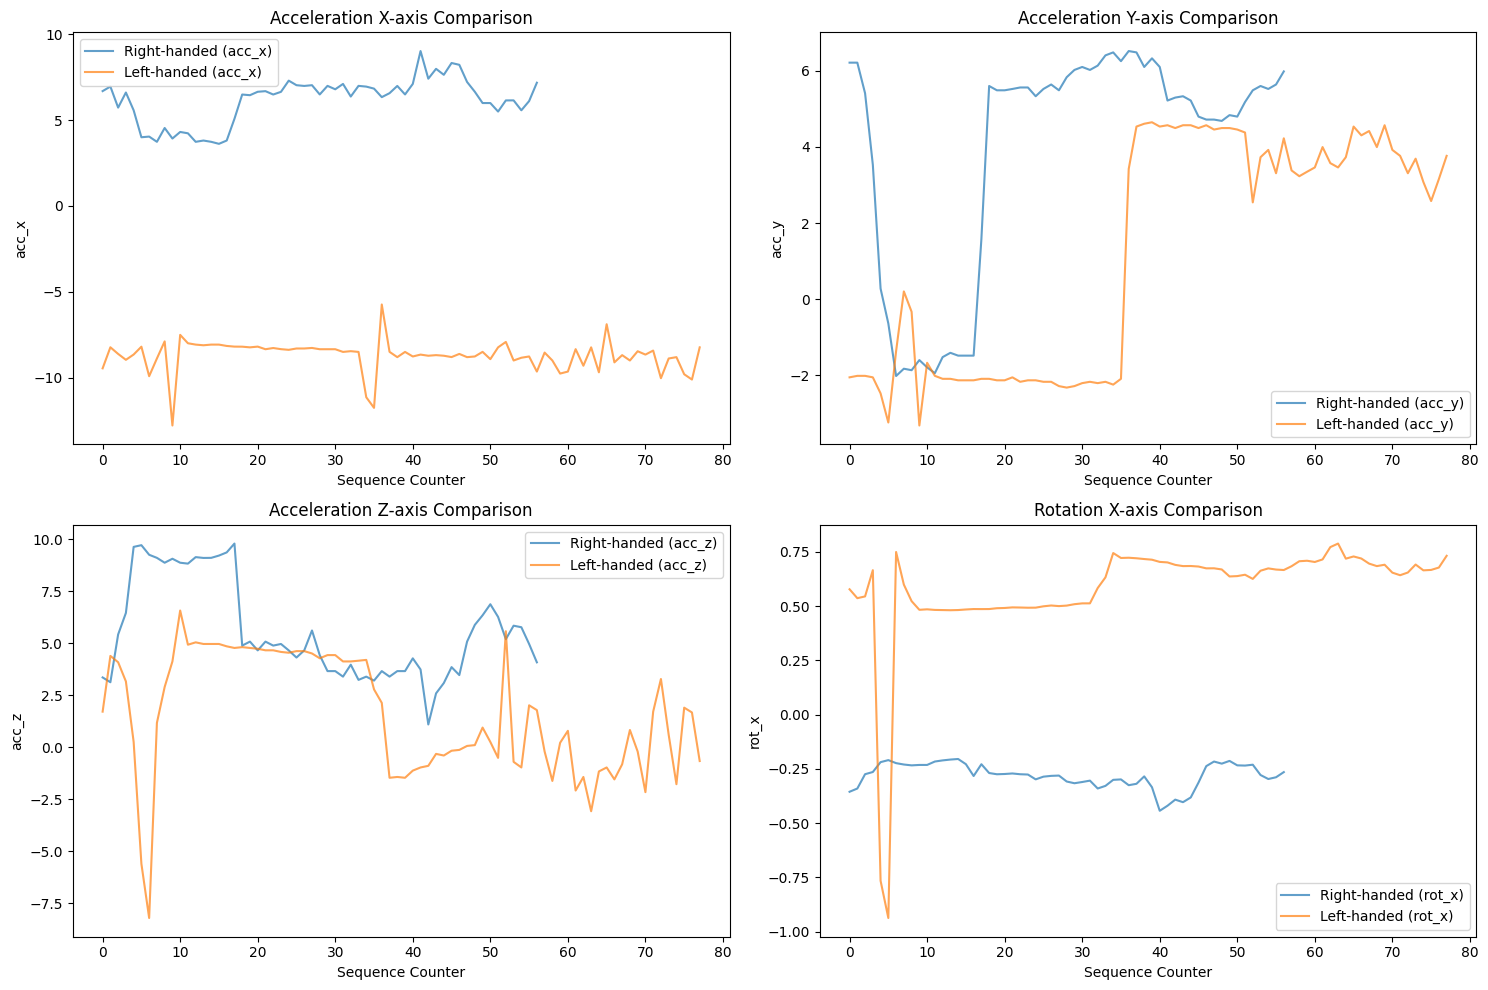

In [5]:
# 利き手ごとのセンサーデータ可視化
plt.figure(figsize=(15, 10))

# サンプルシークエンスを選択
right_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 1]['sequence_id'].unique()[0]
left_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 0]['sequence_id'].unique()[0]

# 加速度データの可視化
plt.subplot(2, 2, 1)
right_data = train_with_handedness[train_with_handedness['sequence_id'] == right_handed_seq]
left_data = train_with_handedness[train_with_handedness['sequence_id'] == left_handed_seq]

plt.plot(right_data['sequence_counter'], right_data['acc_x'], label='Right-handed (acc_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_x'], label='Left-handed (acc_x)', alpha=0.7)
plt.title('Acceleration X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(right_data['sequence_counter'], right_data['acc_y'], label='Right-handed (acc_y)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_y'], label='Left-handed (acc_y)', alpha=0.7)
plt.title('Acceleration Y-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(right_data['sequence_counter'], right_data['acc_z'], label='Right-handed (acc_z)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_z'], label='Left-handed (acc_z)', alpha=0.7)
plt.title('Acceleration Z-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_z')
plt.legend()

plt.subplot(2, 2, 4)
# ジャイロスコープカラムが存在しないため、回転データを使用
plt.plot(right_data['sequence_counter'], right_data['rot_x'], label='Right-handed (rot_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['rot_x'], label='Left-handed (rot_x)', alpha=0.7)
plt.title('Rotation X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('rot_x')
plt.legend()

plt.tight_layout()
plt.show()

### Step3.2: 利き手補正の実装

In [6]:
# セル1：利き手補正の適用
# ------------------------------------------------------------
# 前提：train_with_handedness, test_with_handedness が定義済み
# handedness_correction() をインポートまたは同一セル内に定義しておく
import sys
import os
sys.path.append('..')
from src.utils.preprocessing import handedness_correction
from src.utils.preprocessing import handedness_correction_v2
# セル1：改良版 Handedness Correction 関数 & 適用
import pandas as pd
# セル2：train/test に対して補正＆結果確認
train_corrected = (train_with_handedness)
train_corrected = handedness_correction_v2(train_with_handedness)
test_corrected  = handedness_correction_v2(test_with_handedness)


# センサーカラム数（確認用）
meta_cols = ['row_id','sequence_type','sequence_id','sequence_counter',
             'subject','orientation','behavior','phase','gesture','handedness']
sensor_cols = [c for c in train_corrected.columns if c not in meta_cols]
print(f"センサーカラム数: {len(sensor_cols)}")

print("利き手補正_v2 実行完了")
print(f"Train corrected shape: {train_corrected.shape}")
print(f"Test  corrected shape: {test_corrected.shape}")


センサーカラム数: 332
利き手補正_v2 実行完了
Train corrected shape: (574945, 342)
Test  corrected shape: (107, 337)


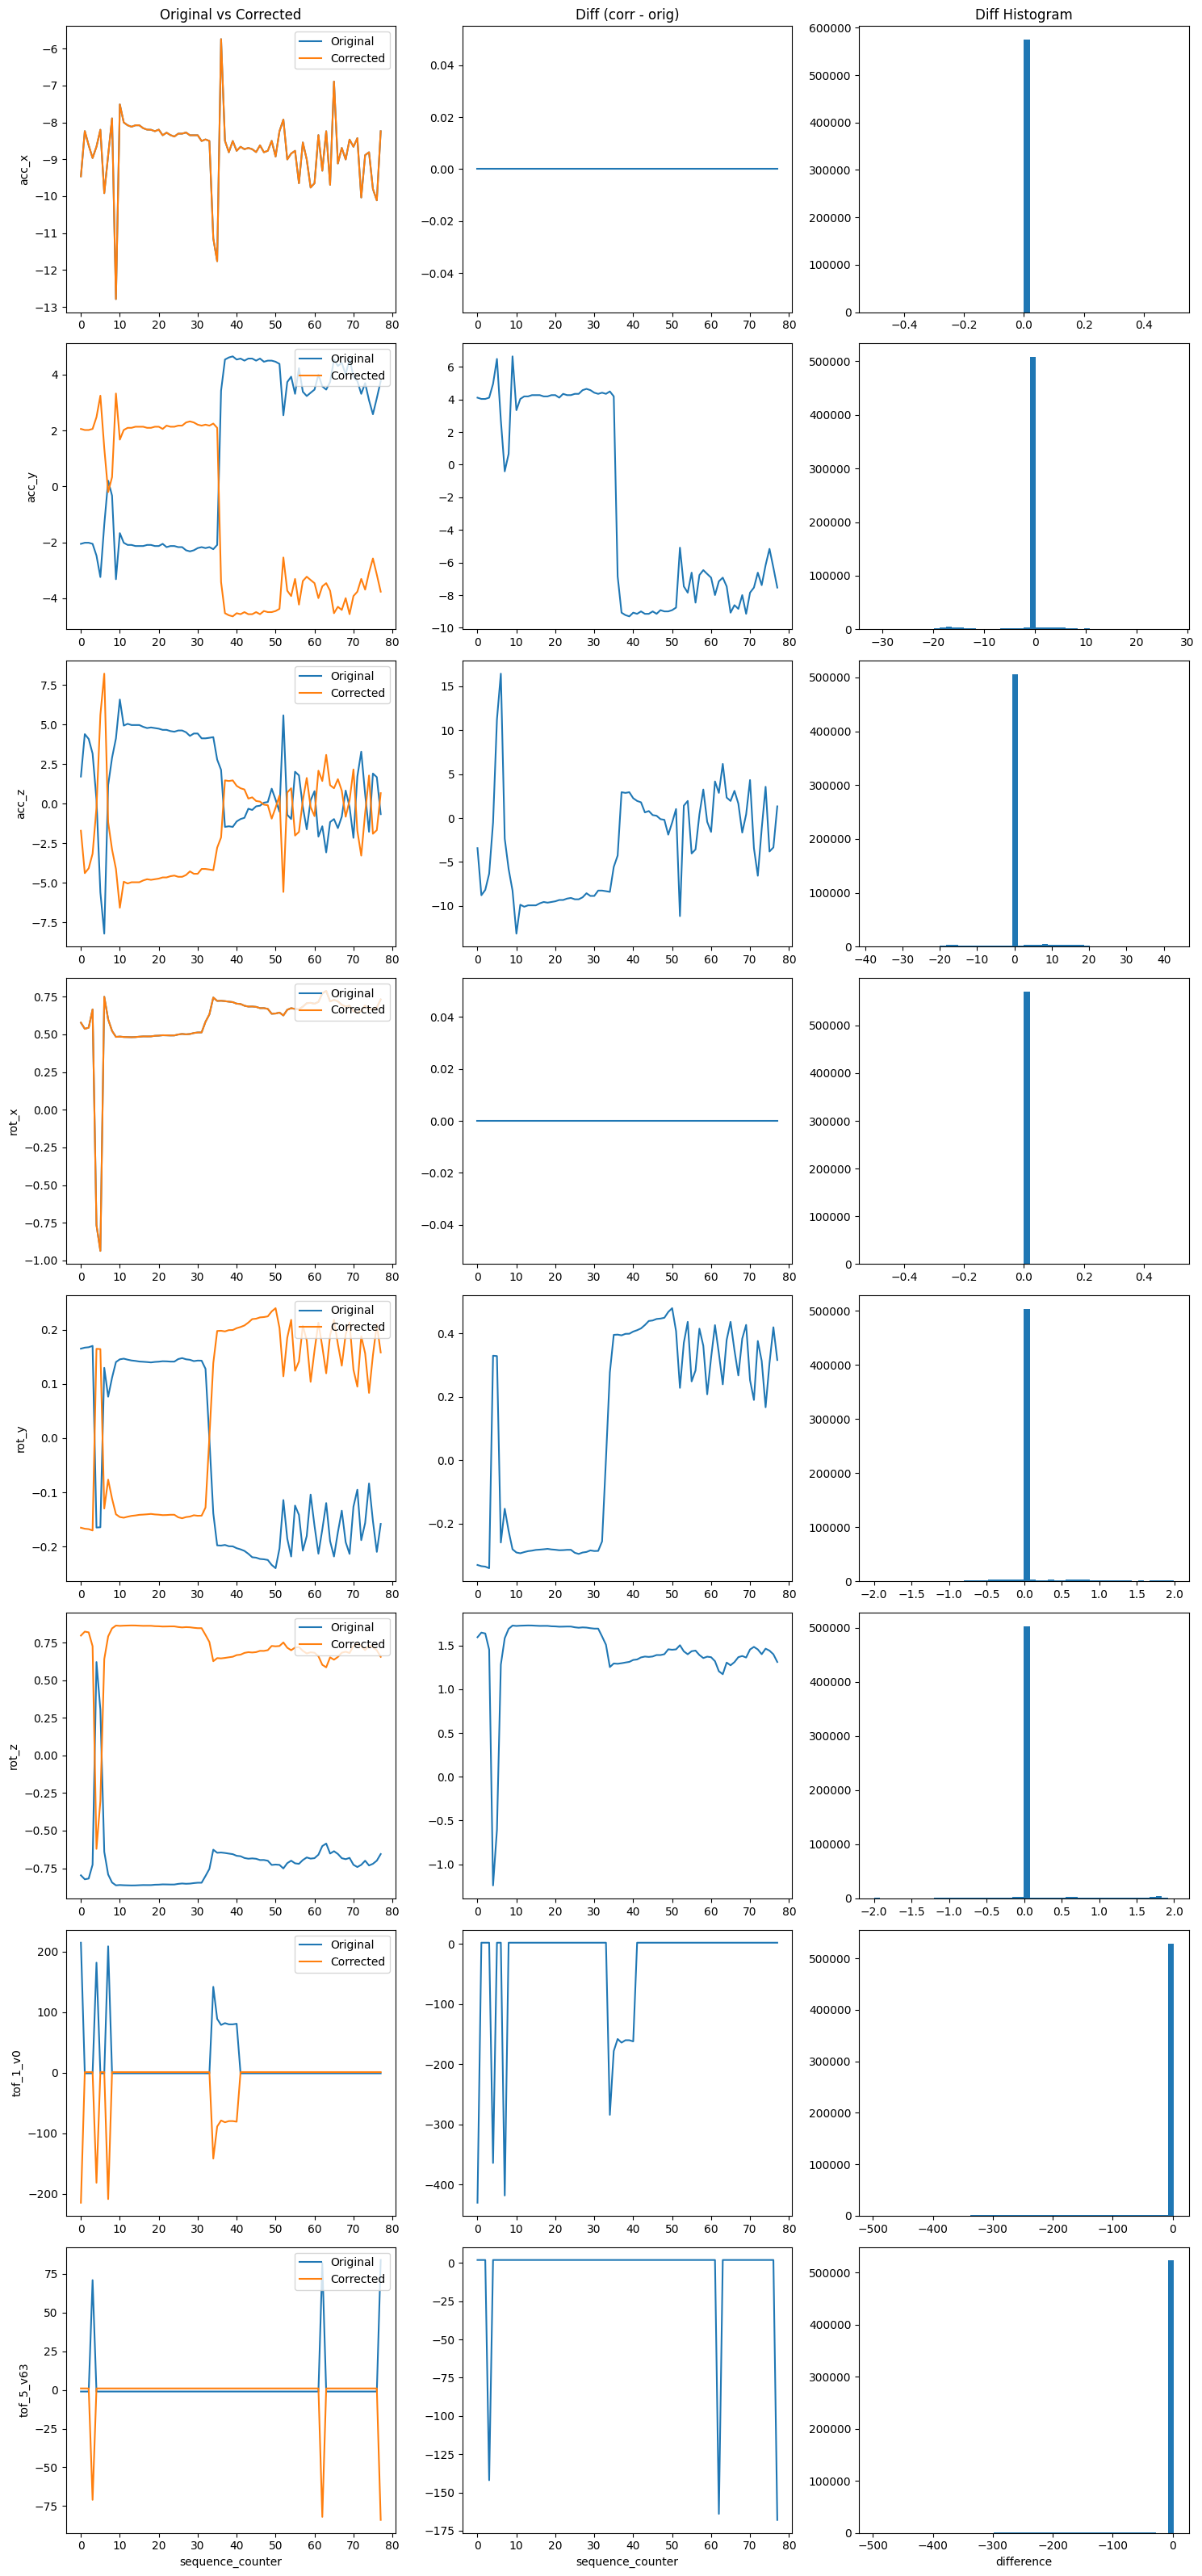

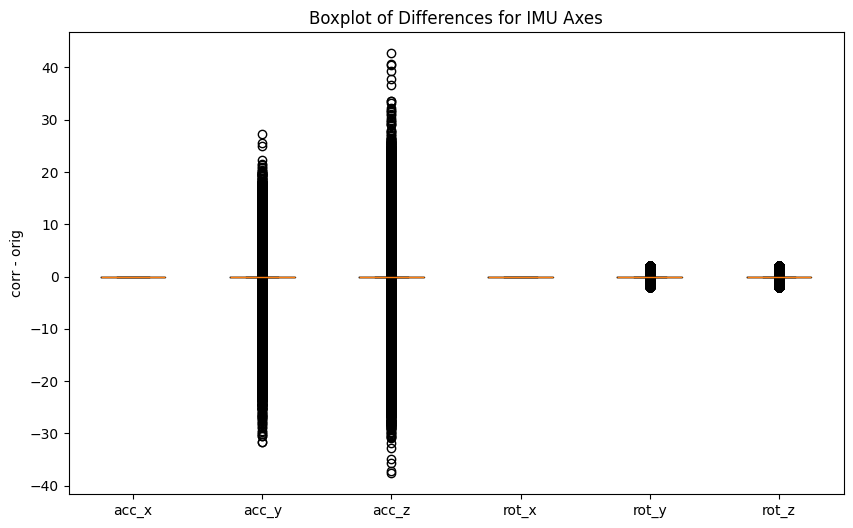

In [7]:
# セル3：強化した可視化
import matplotlib.pyplot as plt

# ── 1) 可視化対象カラムの設定 ───────────────────────────
# IMU系＋代表的なToFチャネル
cols_demo = [
    'acc_x','acc_y','acc_z',
    'rot_x','rot_y','rot_z',
    'tof_1_v0','tof_5_v63'
]

# ── 2) 差分データ準備 ───────────────────────────────────
# train_with_handedness, train_corrected は事前定義済みとする
diff_df = train_corrected[cols_demo] - train_with_handedness[cols_demo]

# ── 3) 例示シーケンスの取得（左利きの最初のシーケンス） ────────────
seq_id = train_with_handedness.loc[train_with_handedness['handedness']==0, 'sequence_id'].iloc[0]
orig_seq = train_with_handedness.query("sequence_id==@seq_id")
corr_seq = train_corrected.query("sequence_id==@seq_id")

# ── 4) 原系列 vs 補正系列 ＆ 差分 ＆ 差分ヒストグラム ────────────
n = len(cols_demo)
fig, axes = plt.subplots(n, 3, figsize=(15, 4*n))

for i, col in enumerate(cols_demo):
    # (a) Original vs Corrected
    axes[i,0].plot(orig_seq['sequence_counter'], orig_seq[col], label='Original')
    axes[i,0].plot(corr_seq['sequence_counter'], corr_seq[col], label='Corrected')
    if i==0: axes[i,0].set_title('Original vs Corrected')
    axes[i,0].set_ylabel(col)
    if i==n-1: axes[i,0].set_xlabel('sequence_counter')
    axes[i,0].legend(loc='upper right')

    # (b) 差分プロット
    diff_series = corr_seq[col].values - orig_seq[col].values
    axes[i,1].plot(orig_seq['sequence_counter'], diff_series)
    if i==0: axes[i,1].set_title('Diff (corr - orig)')
    if i==n-1: axes[i,1].set_xlabel('sequence_counter')

    # (c) 差分ヒストグラム
    axes[i,2].hist(diff_df[col].dropna(), bins=50)
    if i==0: axes[i,2].set_title('Diff Histogram')
    if i==n-1: axes[i,2].set_xlabel('difference')

fig.tight_layout()
plt.show()

# ── 5) 全IMU軸の差分箱ひげ図 ───────────────────────────
imu_cols = ['acc_x','acc_y','acc_z','rot_x','rot_y','rot_z']
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([diff_df[c].dropna() for c in imu_cols], labels=imu_cols)
ax.set_title('Boxplot of Differences for IMU Axes')
ax.set_ylabel('corr - orig')
plt.show()



## Step5: 欠損値の確認と処理

=== Missing Values Analysis ===
Train missing values: 3597807
Test missing values: 0

=== Columns with Missing Values (Top 10) ===
thm_5        33286
tof_5_v63    30142
tof_5_v24    30142
tof_5_v18    30142
tof_5_v19    30142
tof_5_v20    30142
tof_5_v21    30142
tof_5_v22    30142
tof_5_v23    30142
tof_5_v25    30142
dtype: int64


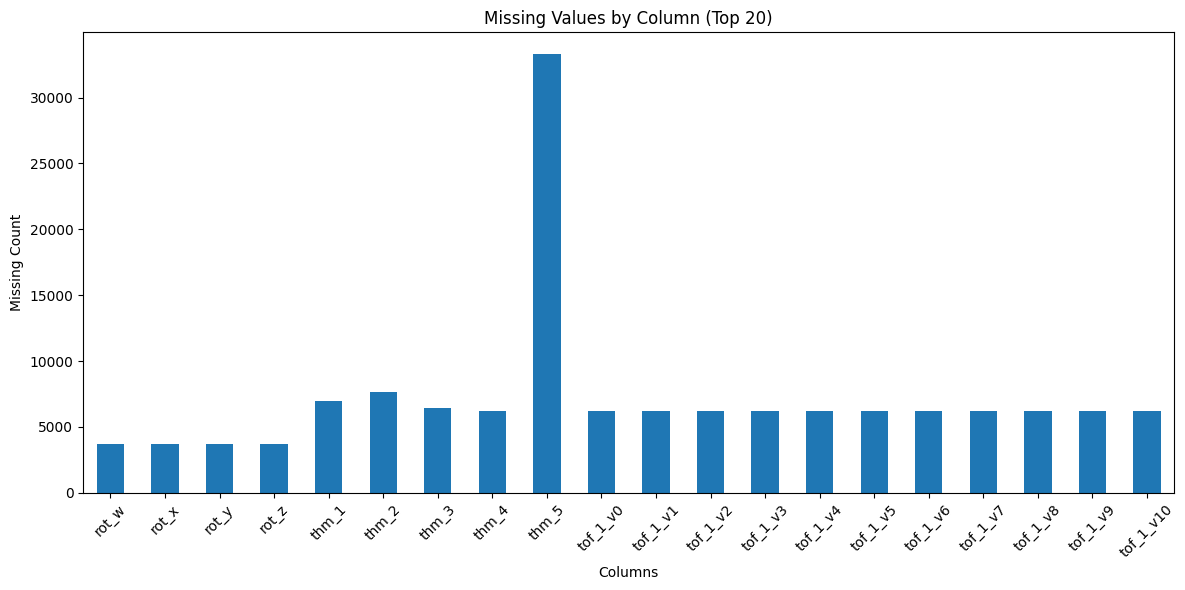

In [8]:
# 欠損値の確認# 利き手情報の結合
print("=== Missing Values Analysis ===")
missing_train = train_corrected.isnull().sum()
missing_test = test_corrected.isnull().sum()

print(f"Train missing values: {missing_train.sum()}")
print(f"Test missing values: {missing_test.sum()}")

# 欠損値が多いカラムを確認
print("\n=== Columns with Missing Values (Top 10) ===")
missing_cols = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_cols.head(10))

# 欠損値の可視化
plt.figure(figsize=(12, 6))
missing_train[missing_train > 0].head(20).plot(kind='bar')
plt.title('Missing Values by Column (Top 20)')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step4.5: 特徴量ごとの欠損値パターン詳細調査

各センサーの特性に応じた欠損値の種類と表現方法を詳しく調査します。


In [9]:
# 特徴量ごとの欠損値パターン詳細調査

def analyze_missing_patterns(df, sensor_type_groups):
    """
    各センサータイプの欠損値パターンを詳細に調査する関数
    """
    print(f"=== 特徴量ごとの欠損値パターン分析 ===")
    print(f"データサイズ: {df.shape}")
    print()
    
    missing_analysis = {}
    
    for sensor_type, columns in sensor_type_groups.items():
        print(f"🔍 {sensor_type} センサーの分析")
        print(f"カラム数: {len(columns)}")
        
        # 各カラムの欠損値パターン
        sensor_data = df[columns]
        
        # 1. NULL値の確認
        null_counts = sensor_data.isnull().sum()
        print(f"  NULL値:")
        null_with_values = null_counts[null_counts > 0]
        if len(null_with_values) > 0:
            print(f"    欠損があるカラム: {len(null_with_values)}/{len(columns)}")
            print(f"    最多欠損: {null_with_values.max():,} ({null_with_values.idxmax()})")
            print(f"    最少欠損: {null_with_values.min():,} ({null_with_values.idxmin()})")
        else:
            print(f"    NULL値なし")
        
        # 2. 特殊値の確認（-1, 0, 異常値など）
        print(f"  特殊値の調査:")
        
        # -1の個数
        minus_one_counts = (sensor_data == -1).sum()
        if minus_one_counts.sum() > 0:
            print(f"    -1の値: {minus_one_counts.sum():,} 個")
            top_minus_one = minus_one_counts[minus_one_counts > 0].head(3)
            for col, count in top_minus_one.items():
                print(f"      {col}: {count:,}")
        
        # 0の個数（センサーによっては無効値）
        zero_counts = (sensor_data == 0).sum()
        if zero_counts.sum() > 0:
            print(f"    0の値: {zero_counts.sum():,} 個")
            top_zero = zero_counts[zero_counts > 0].head(3)
            for col, count in top_zero.items():
                print(f"      {col}: {count:,}")
        
        # 3. 各カラムの値の分布を確認
        print(f"  値の分布:")
        for col in columns[:5]:  # 最初の2カラムのみ表示
            col_data = sensor_data[col].dropna()
            if len(col_data) > 0:
                print(f"    {col}:")
                print(f"      範囲: [{col_data.min():.3f}, {col_data.max():.3f}]")
                print(f"      平均: {col_data.mean():.3f}, 標準偏差: {col_data.std():.3f}")
                
                # 異常値の検出（IQR法）
                Q1 = col_data.quantile(0.25)
                Q3 = col_data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
                print(f"      異常値: {len(outliers)} 個 ({len(outliers)/len(col_data)*100:.1f}%)")
        
        # 4. 欠損値の時系列パターン
        print(f"  時系列パターン:")
        sample_seq = df['sequence_id'].unique()[0]
        sample_data = df[df['sequence_id'] == sample_seq][columns]
        
        total_missing_per_timestamp = sample_data.isnull().sum(axis=1)
        if total_missing_per_timestamp.sum() > 0:
            print(f"    サンプルシーケンス({sample_seq})の欠損パターン:")
            print(f"      欠損があるタイムスタンプ: {(total_missing_per_timestamp > 0).sum()}/{len(sample_data)}")
            print(f"      最大同時欠損カラム数: {total_missing_per_timestamp.max()}")
        else:
            print(f"    サンプルシーケンス({sample_seq})に欠損なし")
        
        missing_analysis[sensor_type] = {
            'null_counts': null_counts,
            'minus_one_counts': minus_one_counts,
            'zero_counts': zero_counts,
            'total_columns': len(columns)
        }
        
        print()
    
    return missing_analysis

# センサータイプ別にカラムをグループ化
sensor_type_groups = {
    'Accelerometer': [col for col in train_corrected.columns if 'acc_' in col],
    'Rotation': [col for col in train_corrected.columns if 'rot_' in col],
    'ToF_Sensor': [col for col in train_corrected.columns if 'tof_' in col],
    'Thermal': [col for col in train_corrected.columns if 'thm_' in col]
}
print(sensor_type_groups)

print("センサータイプ別カラム数:")
for sensor_type, columns in sensor_type_groups.items():
    print(f"  {sensor_type}: {len(columns)} カラム")
print()

# 詳細分析を実行
missing_analysis = analyze_missing_patterns(train_corrected, sensor_type_groups)


{'Accelerometer': ['acc_x', 'acc_y', 'acc_z'], 'Rotation': ['rot_w', 'rot_x', 'rot_y', 'rot_z'], 'ToF_Sensor': ['tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', 'tof_1_v60', 'tof_1_v61', 'tof_1_v62', 'tof_1_v63', 'tof_2_v0', 'tof_2_v1', 'tof_2_v2', 'tof_2_v3', 'tof_2_v4', 'tof_2

## Step4.6: 修正された欠損値処理の実装

調査結果に基づいて、センサータイプごとの適切な欠損値処理を実装します。

### 処理方針
- **Accelerometer**: 異常値（-1, 0）をNaNに変換
- **Rotation**: nullのみ欠損値として扱う
- **ToF_Sensor**: nullと-1を欠損値として扱う
- **Thermal**: nullのみ欠損値として扱う


In [10]:
import sys
import os
sys.path.append('..')

# 新しい欠損値処理関数をインポート
from src.utils.preprocessing import clean_sensor_missing_values

# 処理前のデータ統計を記録
print("=== 処理前のデータ統計 ===")
sensor_cols = [col for col in train_corrected.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]

original_stats = {}
for sensor_type, columns in sensor_type_groups.items():
    existing_cols = [col for col in columns if col in train_corrected.columns]
    if existing_cols:
        null_count = train_corrected[existing_cols].isnull().sum().sum()
        minus_one_count = (train_corrected[existing_cols] == -1).sum().sum()
        zero_count = (train_corrected[existing_cols] == 0).sum().sum()
        
        original_stats[sensor_type] = {
            'null': null_count,
            'minus_one': minus_one_count,
            'zero': zero_count
        }
        
        print(f"{sensor_type}:")
        print(f"  NULL値: {null_count:,}")
        print(f"  -1値: {minus_one_count:,}")
        print(f"  0値: {zero_count:,}")

print(f"\n全体の統計:")
print(f"  総NULL値: {train_corrected[sensor_cols].isnull().sum().sum():,}")
print(f"  総-1値: {(train_corrected[sensor_cols] == -1).sum().sum():,}")
print(f"  総0値: {(train_corrected[sensor_cols] == 0).sum().sum():,}")

# 修正された欠損値処理を実行
print("\n=== 修正された欠損値処理を実行 ===")
train_cleaned_new = clean_sensor_missing_values(train_corrected, sensor_type_groups)
test_cleaned_new = clean_sensor_missing_values(test_corrected, sensor_type_groups)

# 処理後のデータ統計を記録
print("\n=== 処理後のデータ統計 ===")
processed_stats = {}
for sensor_type, columns in sensor_type_groups.items():
    existing_cols = [col for col in columns if col in train_cleaned_new.columns]
    if existing_cols:
        null_count = train_cleaned_new[existing_cols].isnull().sum().sum()
        minus_one_count = (train_cleaned_new[existing_cols] == -1).sum().sum()
        zero_count = (train_cleaned_new[existing_cols] == 0).sum().sum()
        
        processed_stats[sensor_type] = {
            'null': null_count,
            'minus_one': minus_one_count,
            'zero': zero_count
        }
        
        print(f"{sensor_type}:")
        print(f"  NULL値: {null_count:,} (変化: {null_count - original_stats[sensor_type]['null']:+,})")
        print(f"  -1値: {minus_one_count:,} (変化: {minus_one_count - original_stats[sensor_type]['minus_one']:+,})")
        print(f"  0値: {zero_count:,} (変化: {zero_count - original_stats[sensor_type]['zero']:+,})")

print(f"\n全体の統計:")
total_null_after = train_cleaned_new[sensor_cols].isnull().sum().sum()
total_minus_one_after = (train_cleaned_new[sensor_cols] == -1).sum().sum()
total_zero_after = (train_cleaned_new[sensor_cols] == 0).sum().sum()

print(f"  総NULL値: {total_null_after:,} (変化: {total_null_after - train_corrected[sensor_cols].isnull().sum().sum():+,})")
print(f"  総-1値: {total_minus_one_after:,} (変化: {total_minus_one_after - (train_corrected[sensor_cols] == -1).sum().sum():+,})")
print(f"  総0値: {total_zero_after:,} (変化: {total_zero_after - (train_corrected[sensor_cols] == 0).sum().sum():+,})")

print("\n✅ 修正された欠損値処理が完了しました！")


=== 処理前のデータ統計 ===
Accelerometer:
  NULL値: 0
  -1値: 335
  0値: 441
Rotation:
  NULL値: 14,768
  -1値: 0
  0値: 97
ToF_Sensor:
  NULL値: 3,522,432
  -1値: 92,753,358
  0値: 970,109
Thermal:
  NULL値: 60,607
  -1値: 0
  0値: 8,307

全体の統計:
  総NULL値: 3,597,807
  総-1値: 92,753,693
  総0値: 978,954

=== 修正された欠損値処理を実行 ===

=== 処理後のデータ統計 ===
Accelerometer:
  NULL値: 3 (変化: +3)
  -1値: 335 (変化: +0)
  0値: 441 (変化: +0)
Rotation:
  NULL値: 14,768 (変化: +0)
  -1値: 0 (変化: +0)
  0値: 97 (変化: +0)
ToF_Sensor:
  NULL値: 96,275,790 (変化: +92,753,358)
  -1値: 0 (変化: -92,753,358)
  0値: 970,109 (変化: +0)
Thermal:
  NULL値: 60,607 (変化: +0)
  -1値: 0 (変化: +0)
  0値: 8,307 (変化: +0)

全体の統計:
  総NULL値: 96,351,168 (変化: +92,753,361)
  総-1値: 335 (変化: -92,753,358)
  総0値: 978,954 (変化: +0)

✅ 修正された欠損値処理が完了しました！


=== 修正された欠損値処理の詳細分析 ===


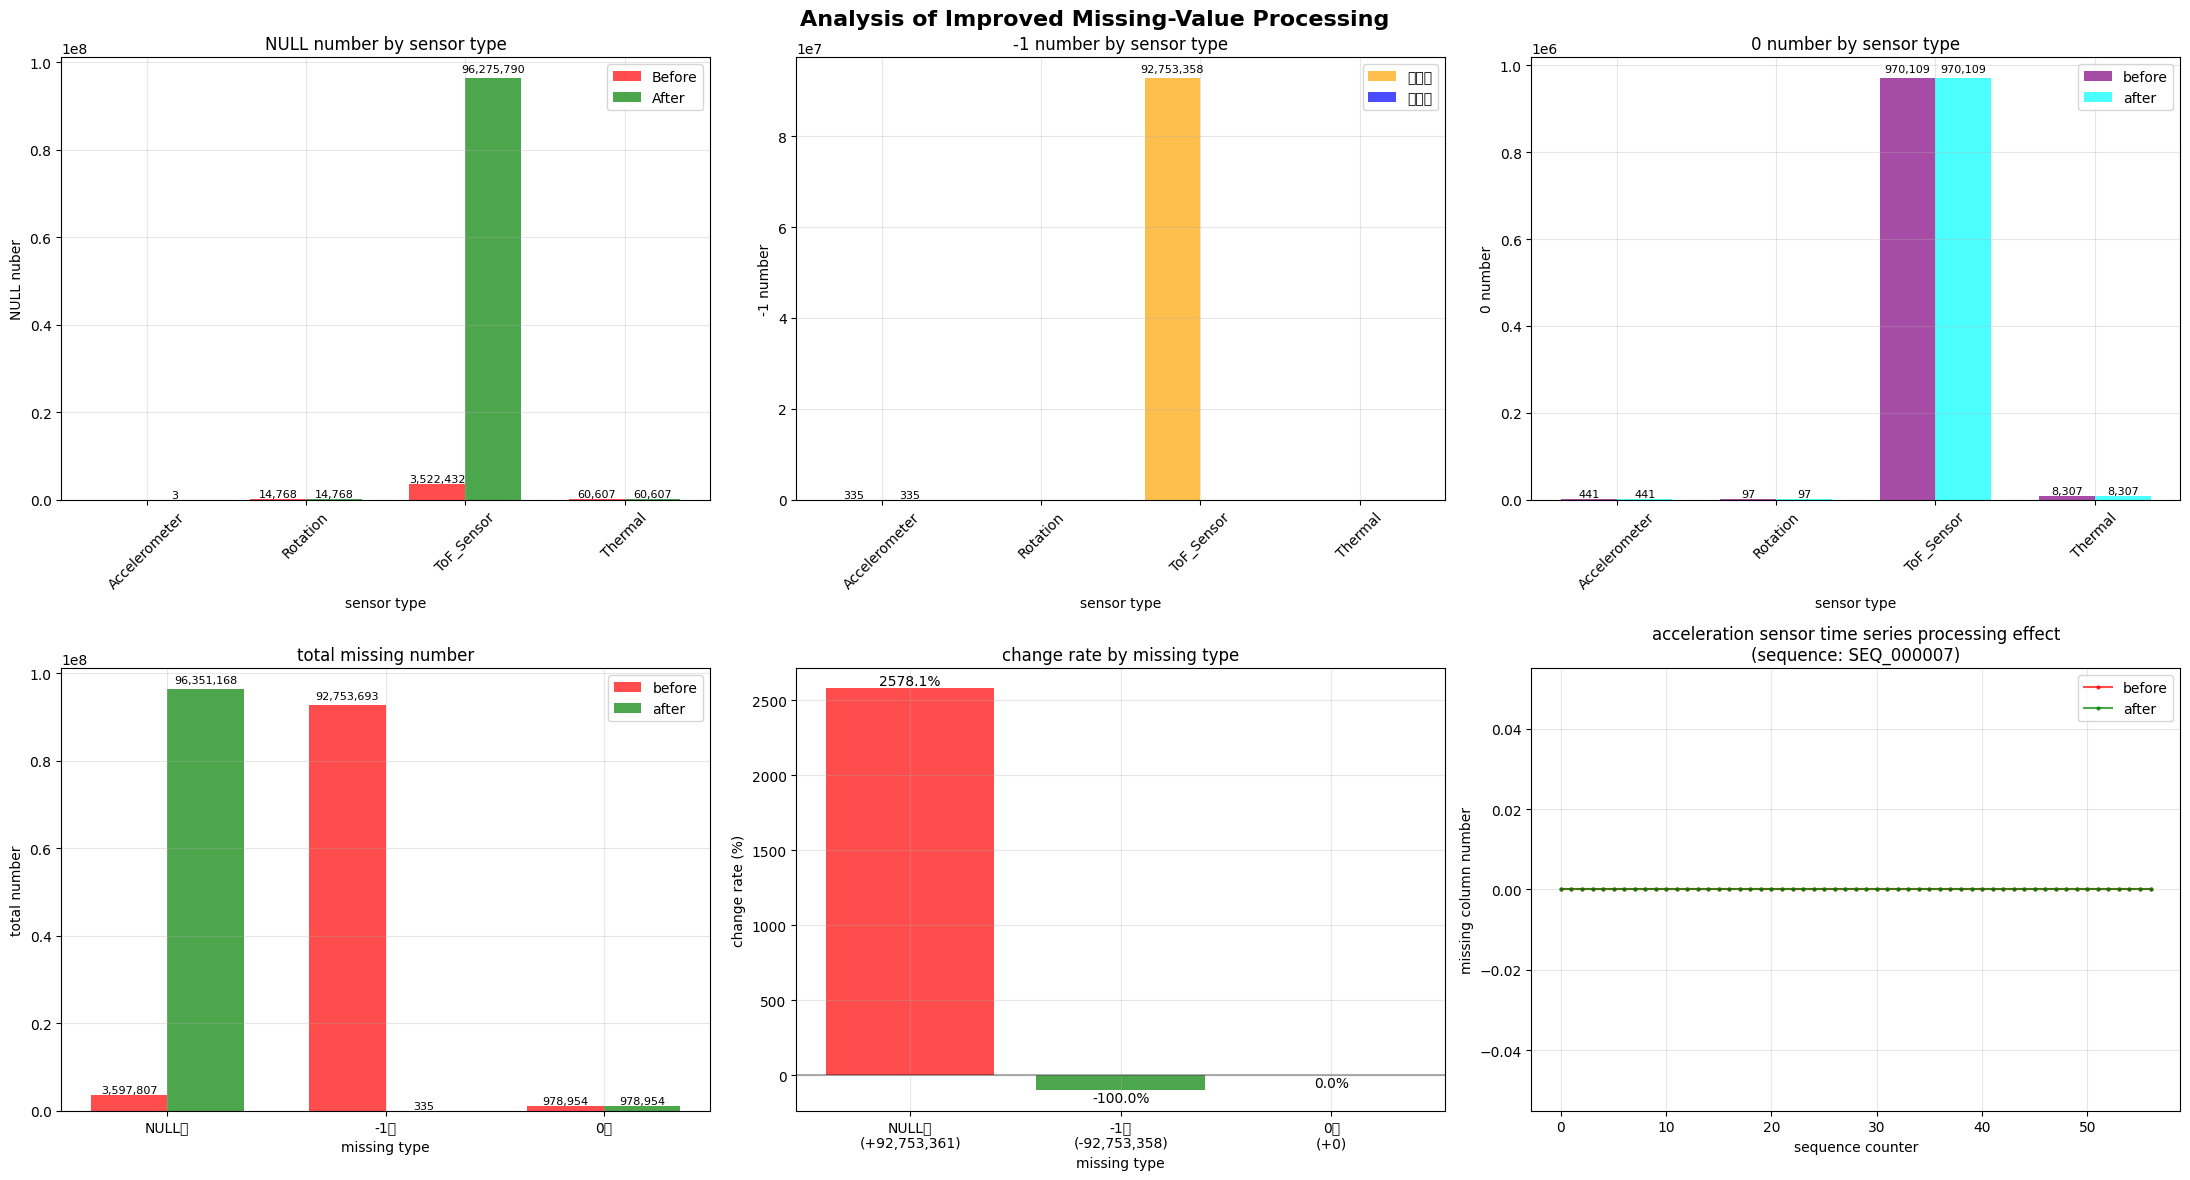

In [11]:
# 修正された欠損値処理の詳細分析と可視化

def analyze_improved_missing_processing(original_df, processed_df, sensor_type_groups):
    """
    修正された欠損値処理の効果を詳細に分析する関数
    """
    fig, axes = plt.subplots(2, 3, figsize=(22, 12))
    fig.suptitle('Analysis of Improved Missing-Value Processing', fontsize=16, fontweight='bold')
    
    # 1. センサータイプ別の処理効果
    ax1 = axes[0, 0]
    sensor_types = list(sensor_type_groups.keys())
    
    # 処理前後のNULL値数を比較
    null_before = []
    null_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            null_before.append(original_df[columns].isnull().sum().sum())
            null_after.append(processed_df[columns].isnull().sum().sum())
        else:
            null_before.append(0)
            null_after.append(0)
    
    x = np.arange(len(sensor_types))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, null_before, width, label='Before', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, null_after, width, label='After', color='green', alpha=0.7)
    
    ax1.set_xlabel('sensor type')
    ax1.set_ylabel('NULL nuber')
    ax1.set_title('NULL number by sensor type')
    ax1.set_xticks(x)
    ax1.set_xticklabels(sensor_types, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 値をバーの上に表示
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 2. 特殊値の処理効果
    ax2 = axes[0, 1]
    
    # -1値の処理効果
    minus_one_before = []
    minus_one_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            minus_one_before.append((original_df[columns] == -1).sum().sum())
            minus_one_after.append((processed_df[columns] == -1).sum().sum())
        else:
            minus_one_before.append(0)
            minus_one_after.append(0)
    
    bars1 = ax2.bar(x - width/2, minus_one_before, width, label='処理前', color='orange', alpha=0.7)
    bars2 = ax2.bar(x + width/2, minus_one_after, width, label='処理後', color='blue', alpha=0.7)
    
    ax2.set_xlabel('sensor type')
    ax2.set_ylabel('-1 number')
    ax2.set_title('-1 number by sensor type')
    ax2.set_xticks(x)
    ax2.set_xticklabels(sensor_types, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 値をバーの上に表示
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 3. 0値の処理効果
    ax3 = axes[0, 2]
    
    # 0値の処理効果
    zero_before = []
    zero_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            zero_before.append((original_df[columns] == 0).sum().sum())
            zero_after.append((processed_df[columns] == 0).sum().sum())
        else:
            zero_before.append(0)
            zero_after.append(0)
    
    bars1 = ax3.bar(x - width/2, zero_before, width, label='before', color='purple', alpha=0.7)
    bars2 = ax3.bar(x + width/2, zero_after, width, label='after', color='cyan', alpha=0.7)
    
    ax3.set_xlabel('sensor type')
    ax3.set_ylabel('0 number')
    ax3.set_title('0 number by sensor type')
    ax3.set_xticks(x)
    ax3.set_xticklabels(sensor_types, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 値をバーの上に表示
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 4. 全体の処理効果サマリー
    ax4 = axes[1, 0]
    
    categories = ['NULL値', '-1値', '0値']
    
    # 全体の統計
    sensor_cols = [col for col in original_df.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]
    
    total_before = [
        original_df[sensor_cols].isnull().sum().sum(),
        (original_df[sensor_cols] == -1).sum().sum(),
        (original_df[sensor_cols] == 0).sum().sum()
    ]
    
    total_after = [
        processed_df[sensor_cols].isnull().sum().sum(),
        (processed_df[sensor_cols] == -1).sum().sum(),
        (processed_df[sensor_cols] == 0).sum().sum()
    ]
    
    x_cat = np.arange(len(categories))
    
    bars1 = ax4.bar(x_cat - width/2, total_before, width, label='before', color='red', alpha=0.7)
    bars2 = ax4.bar(x_cat + width/2, total_after, width, label='after', color='green', alpha=0.7)
    
    ax4.set_xlabel('missing type')
    ax4.set_ylabel('total number')
    ax4.set_title('total missing number')
    ax4.set_xticks(x_cat)
    ax4.set_xticklabels(categories)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 値をバーの上に表示
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 5. 処理効果の定量評価
    ax5 = axes[1, 1]
    
    # 削減・増加率の計算
    changes = []
    change_labels = []
    
    for i, (before, after) in enumerate(zip(total_before, total_after)):
        change = after - before
        if before > 0:
            change_rate = (change / before) * 100
        else:
            change_rate = 0
        changes.append(change_rate)
        change_labels.append(f'{categories[i]}\n({change:+,})')
    
    colors = ['red' if x > 0 else 'green' for x in changes]
    bars = ax5.bar(range(len(changes)), changes, color=colors, alpha=0.7)
    
    ax5.set_xlabel('missing type')
    ax5.set_ylabel('change rate (%)')
    ax5.set_title('change rate by missing type')
    ax5.set_xticks(range(len(changes)))
    ax5.set_xticklabels(change_labels)
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # 値をバーの上に表示
    for bar, change in zip(bars, changes):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -1),
                f'{change:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)
    
    # 6. 時系列での処理効果
    ax6 = axes[1, 2]
    
    # サンプルシーケンスでの処理効果
    sample_seq = original_df['sequence_id'].unique()[0]
    sample_before = original_df[original_df['sequence_id'] == sample_seq]
    sample_after = processed_df[processed_df['sequence_id'] == sample_seq]
    
    # 加速度センサーの処理効果を表示
    acc_cols = [col for col in sensor_type_groups['Accelerometer'] if col in original_df.columns]
    if acc_cols:
        missing_before = sample_before[acc_cols].isnull().sum(axis=1)
        missing_after = sample_after[acc_cols].isnull().sum(axis=1)
        
        ax6.plot(sample_before['sequence_counter'], missing_before, 
                label='before', color='red', marker='o', markersize=2, alpha=0.7)
        ax6.plot(sample_after['sequence_counter'], missing_after, 
                label='after', color='green', marker='o', markersize=2, alpha=0.7)
        
        ax6.set_xlabel('sequence counter')
        ax6.set_ylabel('missing column number')
        ax6.set_title(f'acceleration sensor time series processing effect\n(sequence: {sample_seq})')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    else:
        ax6.text(0.5, 0.5, '加速度センサーデータが見つかりません', 
                ha='center', va='center', transform=ax6.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'null_before': total_before[0],
        'null_after': total_after[0],
        'minus_one_before': total_before[1],
        'minus_one_after': total_after[1],
        'zero_before': total_before[2],
        'zero_after': total_after[2]
    }

# 詳細分析を実行
print("=== 修正された欠損値処理の詳細分析 ===")
analysis_results = analyze_improved_missing_processing(train_corrected, train_cleaned_new, sensor_type_groups)


In [12]:
# 修正された欠損値処理の効果レポート

print("=== 修正された欠損値処理の効果レポート ===")
print(f"📊 処理結果サマリー:")
print(f"  処理前総欠損値数: {analysis_results['null_before']:,}")
print(f"  処理後総欠損値数: {analysis_results['null_after']:,}")
print(f"  欠損値の増加: {analysis_results['null_after'] - analysis_results['null_before']:+,}")
print(f"  増加率: {((analysis_results['null_after'] - analysis_results['null_before']) / analysis_results['null_before'] * 100):.1f}%")

print(f"\n📈 特殊値の処理効果:")
print(f"  -1値の削減: {analysis_results['minus_one_before'] - analysis_results['minus_one_after']:,}")
print(f"  0値の削減: {analysis_results['zero_before'] - analysis_results['zero_after']:,}")

print(f"\n🔄 処理の妥当性:")
# 欠損値の増加は、-1と0の値がNaNに変換されたことによる
expected_increase = (analysis_results['minus_one_before'] - analysis_results['minus_one_after']) + \
                   (analysis_results['zero_before'] - analysis_results['zero_after'])
actual_increase = analysis_results['null_after'] - analysis_results['null_before']

print(f"  期待される欠損値増加: {expected_increase:,}")
print(f"  実際の欠損値増加: {actual_increase:,}")
print(f"  差分: {actual_increase - expected_increase:,}")

if abs(actual_increase - expected_increase) <= 1000:  # 誤差範囲内
    print("  ✅ 処理は期待通りに動作しています")
else:
    print("  ⚠️ 処理に想定外の変化があります")


print("\n✅ 修正された欠損値処理が正常に完了しました！")
print("次のステップ: 補間処理を適用して欠損値を埋めます")


=== 修正された欠損値処理の効果レポート ===
📊 処理結果サマリー:
  処理前総欠損値数: 3,597,807
  処理後総欠損値数: 96,351,168
  欠損値の増加: +92,753,361
  増加率: 2578.1%

📈 特殊値の処理効果:
  -1値の削減: 92,753,358
  0値の削減: 0

🔄 処理の妥当性:
  期待される欠損値増加: 92,753,358
  実際の欠損値増加: 92,753,361
  差分: 3
  ✅ 処理は期待通りに動作しています

✅ 修正された欠損値処理が正常に完了しました！
次のステップ: 補間処理を適用して欠損値を埋めます


## 5 データ補間


In [13]:
# ============================================================
# ❶ データ欠損補完（ディスク退避＋並列 + 進捗バー）
#     * 各センサー種別ごとに最適な補間ルールを適用
#     * 処理済みを Parquet キャッシュに保存
# ============================================================

from pathlib import Path
from src.utils.preprocessing import clean_missing_sensor_data_parallel_disk
import pandas as pd, hashlib, json, gc

CACHE_DIR = Path("cache"); CACHE_DIR.mkdir(exist_ok=True)
TR_PARQ   = CACHE_DIR / "train_clean.parquet"
TS_PARQ   = CACHE_DIR / "test_clean.parquet"
META      = CACHE_DIR / "clean_meta.json"

def md5(path): return hashlib.md5(path.read_bytes()).hexdigest()

# ---------- キャッシュ判定 ----------
need_recalc = (
    not TR_PARQ.exists()
    or not META.exists()
    or json.loads(META.read_text())["raw_train_md5"] != md5(Path("../data/train.csv"))
)

# センサー種別ごとのカラムグループ
sensor_type_groups = {
    "Accelerometer": [c for c in train_cleaned_new.columns if c.startswith("acc_")],
    "Rotation":      [c for c in train_cleaned_new.columns if c.startswith("rot_")],
    "ToF_Sensor":    [c for c in train_cleaned_new.columns if c.startswith("tof_")],
    "Thermal":       [c for c in train_cleaned_new.columns if c.startswith("thm_")],
}

if need_recalc:
    print("=== 修正欠損補完 (disk-parallel) ===")

    # ---- Train --------------------------------------------------------
    train_interp = clean_missing_sensor_data_parallel_disk(
        train_cleaned_new,
        sensor_type_groups=sensor_type_groups,
        group_cols=("subject","sequence_id"),
        time_col="sequence_counter",
        n_jobs=-1,          # 全コア
    )
    train_interp.to_parquet(TR_PARQ, compression="zstd")

    # ---- Test ---------------------------------------------------------
    test_interp = clean_missing_sensor_data_parallel_disk(
        test_cleaned_new,
        sensor_type_groups=sensor_type_groups,
        group_cols=("subject","sequence_id"),
        time_col="sequence_counter",
        n_jobs=-1,
    )
    test_interp.to_parquet(TS_PARQ, compression="zstd")

    # ---- メタ情報保存 -------------
    meta = dict(
        raw_train_md5 = md5(Path("../data/train.csv")),
        raw_test_md5  = md5(Path("../data/test.csv")),
        created       = pd.Timestamp.utcnow().isoformat()
    )
    META.write_text(json.dumps(meta, indent=2))
    print("💾 Cached cleaned data →", TR_PARQ, TS_PARQ)

    train_final_new, test_final_new = train_interp, test_interp
    del train_interp, test_interp; gc.collect()

else:
    print("✅ Using cached cleaned parquet")
    train_final_new = pd.read_parquet(TR_PARQ)
    test_final_new  = pd.read_parquet(TS_PARQ)

# -----------------------------
# 効果サマリー（ログのみ）
# -----------------------------
before = train_cleaned_new.isna().sum().sum()
after  = train_final_new .isna().sum().sum()
print(f"Missing reduced: {before-after:,} / {before:,} "
      f"({(before-after)/before*100:.1f} %)")


✅ Using cached cleaned parquet
Missing reduced: 96,275,866 / 96,351,168 (99.9 %)


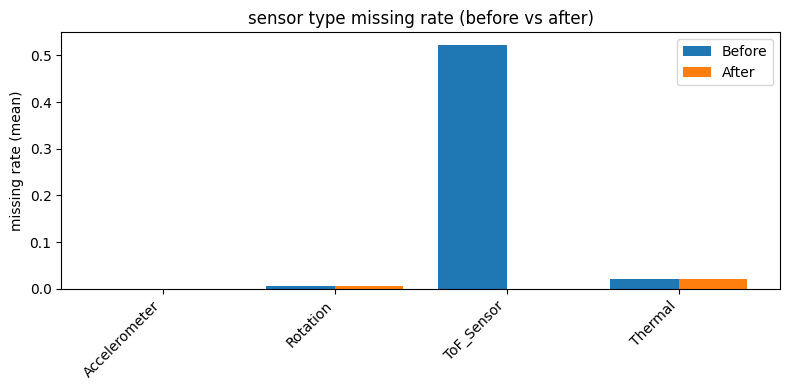

In [14]:
# セルA：センサータイプ別欠損率 before/after バープロット
import matplotlib.pyplot as plt

# sensor_type_groups は前セル定義済み
missing_before = {stype: train_cleaned_new[cols].isna().mean().mean()
                  for stype, cols in sensor_type_groups.items()}
missing_after  = {stype: train_final_new [cols].isna().mean().mean()
                  for stype, cols in sensor_type_groups.items()}

types = list(missing_before.keys())
before_vals = [missing_before[t] for t in types]
after_vals  = [missing_after[t]  for t in types]
x = range(len(types))

plt.figure(figsize=(8,4))
plt.bar([i-0.2 for i in x], before_vals, width=0.4, label='Before')
plt.bar([i+0.2 for i in x], after_vals,  width=0.4, label='After')
plt.xticks(x, types, rotation=45, ha='right')
plt.ylabel('missing rate (mean)')
plt.title('sensor type missing rate (before vs after)')
plt.legend()
plt.tight_layout()
plt.show()


可視化対象カラム: ['tof_5_v55', 'tof_5_v47', 'tof_5_v39']
代表シーケンスID: SEQ_014205


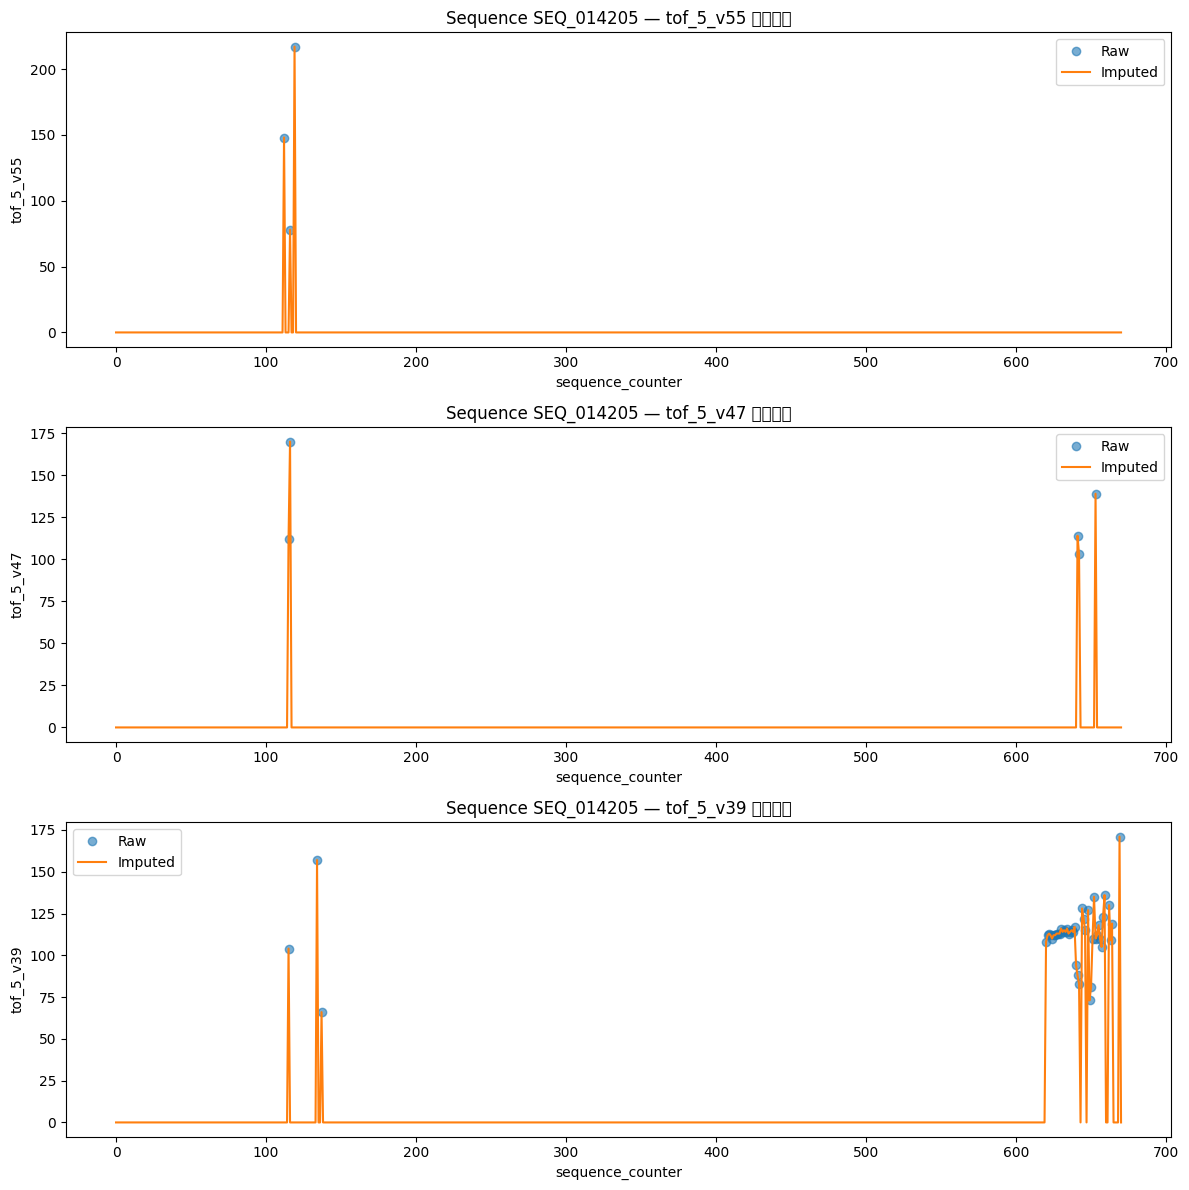

In [15]:
# セルB：補間効果トップのカラムを自動選択し、代表シーケンスで Raw vs Imputed を可視化
import matplotlib.pyplot as plt

# 1) 各カラムの欠損削減数を計算
interp_cols = sum(sensor_type_groups.values(), [])
missing_before = train_cleaned_new[interp_cols].isna().sum()
missing_after  = train_final_new [interp_cols].isna().sum()
reduction      = (missing_before - missing_after).sort_values(ascending=False)

# 2) 欠損削減があった上位3カラム
top_cols = reduction[reduction > 0].head(3).index.tolist()
print("可視化対象カラム:", top_cols)

# 3) それらのカラムに最も欠損があったシーケンスIDを選択
seq_missing = train_cleaned_new.groupby('sequence_id')[top_cols] \
                 .apply(lambda df: df.isna().sum().sum())
seq_id = seq_missing.idxmax()
print("代表シーケンスID:", seq_id)

# 4) データ抽出
mask = train_cleaned_new['sequence_id'] == seq_id
orig = train_cleaned_new.loc[mask]
imp  = train_final_new .loc[mask]

# 5) プロット
fig, axes = plt.subplots(len(top_cols), 1, figsize=(12, 4*len(top_cols)))
for i, col in enumerate(top_cols):
    axes[i].plot(orig['sequence_counter'], orig[col], 'o', alpha=0.6, label='Raw')
    axes[i].plot( imp['sequence_counter'],  imp[col], '-', label='Imputed')
    axes[i].set_title(f"Sequence {seq_id} — {col} 補間前後")
    axes[i].set_xlabel('sequence_counter')
    axes[i].set_ylabel(col)
    axes[i].legend()
plt.tight_layout()
plt.show()


##6 IMUワールド座標系変換


In [16]:
# セルD-1: IMU world-frame 変換＋線形加速度計算
import numpy as np
import pandas as pd
from src.utils.preprocessing import transform_world_frame_by_subject

# 前提: train_cleaned_new に acc_*/rot_* がある
df = train_cleaned_new.copy()
# セルD-2：ワールド座標変換の実行＆キャッシュ利用
from pathlib import Path

CACHE_DIR = Path("cache")
TRAIN_CACHE = CACHE_DIR / "train_world.parquet"
TEST_CACHE  = CACHE_DIR / "test_world.parquet"

# — Train —
if TRAIN_CACHE.exists():
    print("✅ Load cached train_world")
    train_world = pd.read_parquet(TRAIN_CACHE)
else:
    print("🌀 Compute train_world")
    train_world = transform_world_frame_by_subject(
        df,
        cache_path=TRAIN_CACHE
    )
    print("💾 Cached train_world →", TRAIN_CACHE)

# — Test —
if TEST_CACHE.exists():
    print("✅ Load cached test_world")
    test_world = pd.read_parquet(TEST_CACHE)
else:
    print("🌀 Compute test_world")
    test_world = transform_world_frame_by_subject(
        test_cleaned_new,
        cache_path=TEST_CACHE,
    )
    print("💾 Cached test_world →", TEST_CACHE)


✅ Load cached train_world
✅ Load cached test_world


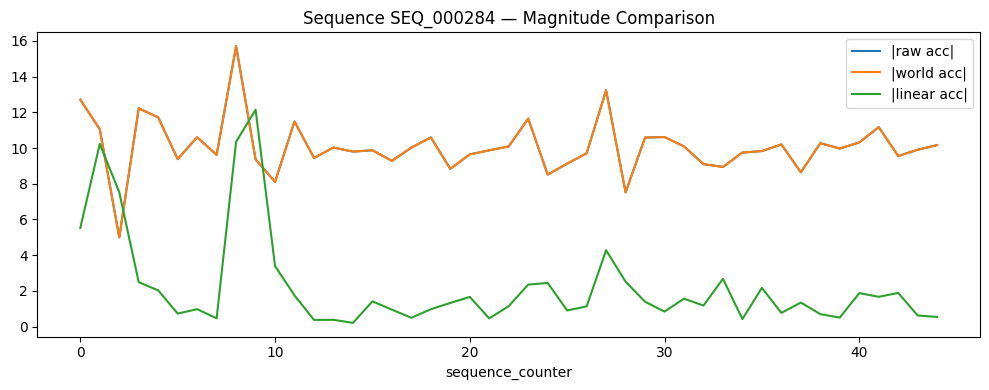

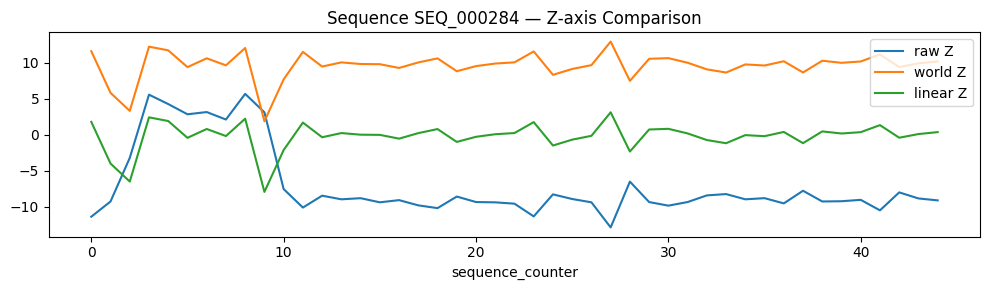

In [17]:
# セルD-2: 変換の確認可視化
import matplotlib.pyplot as plt

# 代表シーケンスを抽出
seq0 = train_world['sequence_id'].unique()[0]
mask = train_world['sequence_id']==seq0
subset = train_world[mask]
t = subset['sequence_counter']

# (1) 大きさ比較
mag_raw   = np.linalg.norm(subset[['acc_x','acc_y','acc_z']], axis=1)
mag_world = np.linalg.norm(subset[['acc_w_x','acc_w_y','acc_w_z']], axis=1)
mag_lin   = np.linalg.norm(subset[['lin_acc_x','lin_acc_y','lin_acc_z']], axis=1)

plt.figure(figsize=(10,4))
plt.plot(t, mag_raw,   label='|raw acc|')
plt.plot(t, mag_world, label='|world acc|')
plt.plot(t, mag_lin,   label='|linear acc|')
plt.title(f'Sequence {seq0} — Magnitude Comparison')
plt.xlabel('sequence_counter')
plt.legend()
plt.tight_layout()
plt.show()

# (2) 軸別比較 (Z 軸例)
plt.figure(figsize=(10,3))
plt.plot(t, subset['acc_z'],    label='raw Z')
plt.plot(t, subset['acc_w_z'],  label='world Z')
plt.plot(t, subset['lin_acc_z'],label='linear Z')
plt.title(f'Sequence {seq0} — Z-axis Comparison')
plt.xlabel('sequence_counter')
plt.legend()
plt.tight_layout()
plt.show()


## 7 window分割

In [18]:
# セルJ-1: パディング付きスライディングウィンドウ生成 + 統計算出

import yaml
import numpy as np
import pandas as pd
from src.utils.preprocessing import create_sliding_windows_with_demographics

# 1) 設定読み込み
with open("../config_v2.yaml", "r") as f:
    cfg = yaml.safe_load(f)

ws      = cfg["preprocessing"]["window_size"]
st      = cfg["preprocessing"]["stride"]
min_len = cfg["preprocessing"]["min_sequence_length"]
pv      = cfg["preprocessing"]["padding_value"]
sensor_cols       = cfg["sensor_cols"]
demographics_cols = cfg["demographics_cols"]

train_demographics = pd.read_csv('../data/train_demographics.csv')
train_demographics.drop(columns=['handedness'], inplace=True)
df = train_world.merge(train_demographics, on='subject', how='left')
print(df.columns.tolist())

# --- 関数呼び出し ---
X_sensor_windows, X_demo_windows, y_windows, info = create_sliding_windows_with_demographics(
    df=df,
    window_size=ws,
    stride=st,
    sensor_cols=sensor_cols,
    demographics_cols=demographics_cols,
    min_sequence_length=min_len,
    padding_value=pv,
)

# --- 統計表示 ---
info_df = pd.DataFrame(info)
total          = len(X_sensor_windows)
padded_counts  = info_df["padded"].value_counts()
gesture_counts = pd.Series(y_windows).value_counts()

print(f"Total windows: {total}")
print(f"Padded windows: {padded_counts.get(True,0)} ({padded_counts.get(True,0)/total:.1%})")
print("\nWindows per gesture:")
display(gesture_counts)


['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', '

Neck - scratch                                735
Text on phone                                 672
Eyebrow - pull hair                           657
Forehead - scratch                            643
Neck - pinch skin                             642
Cheek - pinch skin                            642
Eyelash - pull hair                           641
Forehead - pull hairline                      640
Above ear - pull hair                         638
Write name in air                             482
Wave hello                                    481
Pull air toward your face                     477
Feel around in tray and pull out an object    179
Glasses on/off                                166
Scratch knee/leg skin                         165
Pinch knee/leg skin                           161
Write name on leg                             161
Drink from bottle/cup                         161
Name: count, dtype: int64

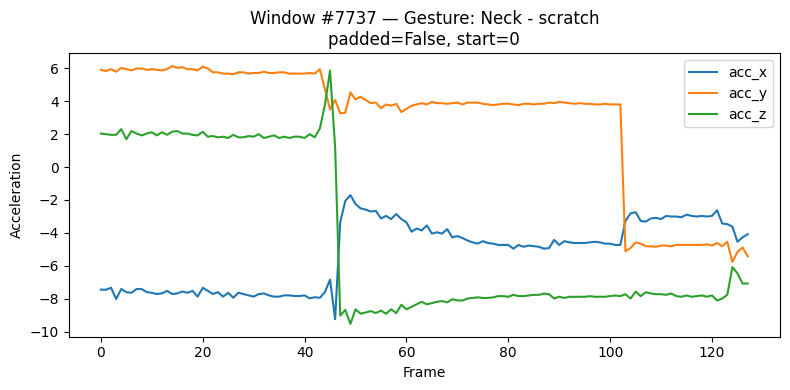

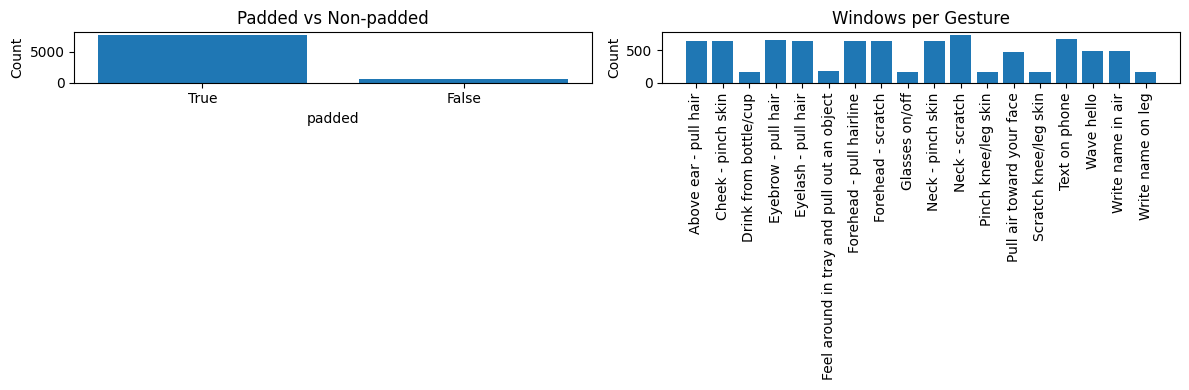

In [19]:
# セルJ-2: サンプルウィンドウ可視化 + 統計グラフ

import numpy as np
import matplotlib.pyplot as plt
import random

idx   = random.randrange(total)
win   = X_sensor_windows[idx]
label = y_windows[idx]
pad   = info_df.loc[idx,"padded"]
start = info_df.loc[idx,"start_idx"]
t     = np.arange(win.shape[0])

# (1) センサー加速度 X/Y/Z の時系列
plt.figure(figsize=(8,4))
for ax_col in ["acc_x","acc_y","acc_z"]:
    plt.plot(t, win[:, sensor_cols.index(ax_col)], label=ax_col)
plt.title(f"Window #{idx} — Gesture: {label}\npadded={pad}, start={start}")
plt.xlabel("Frame")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.show()

# (2) パディング比率 & ジェスチャー分布
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.bar(padded_counts.index.astype(str), padded_counts.values)
ax1.set_title("Padded vs Non-padded")
ax1.set_xlabel("padded")
ax1.set_ylabel("Count")

gc = gesture_counts.sort_index()
ax2.bar(gc.index, gc.values)
ax2.set_title("Windows per Gesture")
ax2.set_xticklabels(gc.index, rotation=90)
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()


## 8 正規化



In [25]:
# セル C-3: 正規化の実行
import numpy as np
from src.utils.preprocessing import normalize_sensor_data, normalize_tabular_data

# セル C-5: 前処理情報の保存
import joblib
import yaml

# 1) 正規化 → センサー・デモ双方のスケーラを生成
X_sensor_norm, sensor_scaler = normalize_sensor_data(X_sensor_windows)
X_demo_norm,   demo_scaler   = normalize_tabular_data(X_demo_windows)

# 2) スケーラをディスクに保存
joblib.dump(sensor_scaler, "../models/sensor_scaler.pkl")
joblib.dump(demo_scaler,   "../models/demo_scaler.pkl")

# 3) config_v2.yaml から使ったカラムリストを抜き出して保存
with open("../config_v2.yaml", "r") as f:
    cfg = yaml.safe_load(f)

preproc_info = {
    "sensor_cols":       cfg["sensor_cols"],
    "demographics_cols": cfg["demographics_cols"],
    "window_size":       cfg["preprocessing"]["window_size"],
    "stride":            cfg["preprocessing"]["stride"],
    "min_sequence_length": cfg["preprocessing"]["min_sequence_length"],
    "padding_value":     cfg["preprocessing"]["padding_value"],
}

with open("../models/preproc_info.yaml", "w") as f:
    yaml.safe_dump(preproc_info, f)


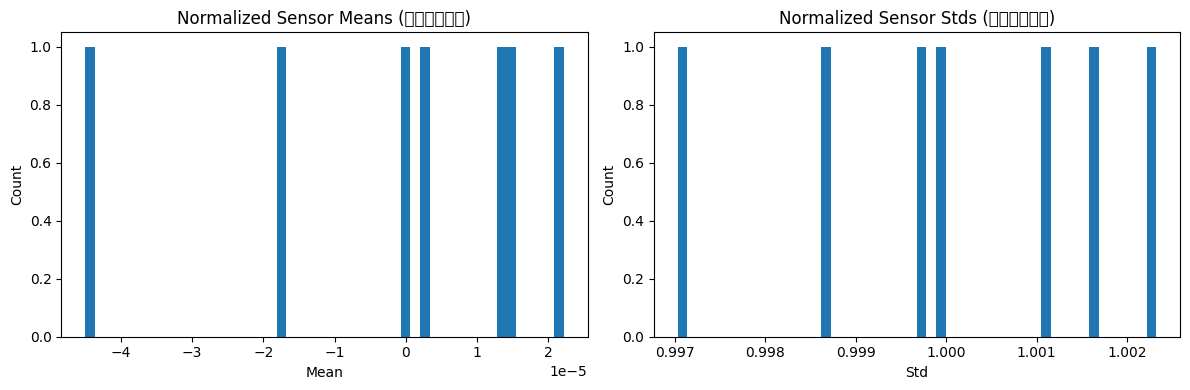

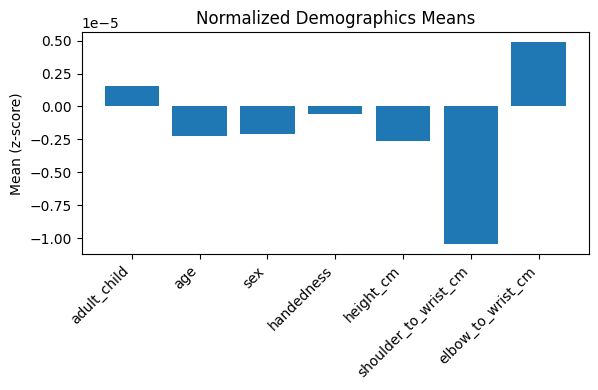

In [ ]:
# セル C-4: 正規化後の分布可視化
import matplotlib.pyplot as plt

# --- センサー特徴量ごとの平均・標準偏差ヒストグラム ---
n_windows, window_size, n_features = X_sensor_norm.shape
X_flat = X_sensor_norm.reshape(-1, n_features)

means = X_flat.mean(axis=0)
stds  = X_flat.std(axis=0)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(means, bins=50)
plt.title("Normalized Sensor Means (全ウィンドウ)")
plt.xlabel("Mean")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(stds, bins=50)
plt.title("Normalized Sensor Stds (全ウィンドウ)")
plt.xlabel("Std")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- デモグラフィック特徴量の平均プロット ---
feature_names = demographics_cols  # config_v2.yaml から読み込んだリスト
demo_means = X_demo_norm.mean(axis=0)

plt.figure(figsize=(6,4))
plt.bar(feature_names, demo_means)
plt.xticks(rotation=45, ha="right")
plt.title("Normalized Demographics Means")
plt.ylabel("Mean (z-score)")
plt.tight_layout()
plt.show()


In [27]:
# セル C-6: 前後統計比較（センサー・デモ双方）
import numpy as np
import pandas as pd

# --- センサー特徴量の統計比較 ---
# 形状: (n_windows, window_size, n_features)
n, t, f = X_sensor_windows.shape

# 前処理前のフラットデータ
orig_flat = np.nan_to_num(
    X_sensor_windows.reshape(-1, f),
    nan=0.0
)
# 前処理後のフラットデータ
norm_flat = X_sensor_norm.reshape(-1, f)

sensor_stats = pd.DataFrame({
    "mean_before": orig_flat.mean(axis=0),
    "std_before":  orig_flat.std(axis=0),
    "mean_after":  norm_flat.mean(axis=0),
    "std_after":   norm_flat.std(axis=0),
}, index=sensor_cols)

# --- デモグラフィック特徴量の統計比較 ---
# 形状: (n_windows, n_demo_features)
demo_stats = pd.DataFrame({
    "mean_before": X_demo_windows.mean(axis=0),
    "std_before":  X_demo_windows.std(axis=0),
    "mean_after":  X_demo_norm.mean(axis=0),
    "std_after":   X_demo_norm.std(axis=0),
}, index=demographics_cols)

# 結果を表示
print("=== Sensor Features Statistics ===")
display(sensor_stats)

print("\n=== Demographics Features Statistics ===")
display(demo_stats)


=== Sensor Features Statistics ===


,mean_before,std_before,mean_after,std_after
acc_x,0.911561,4.317984,2.218505e-05,1.001075
acc_y,0.634967,3.817926,-4.502775e-05,0.997032
acc_z,-0.066870,4.516613,3.288996e-06,0.999900
rot_w,0.195556,0.246609,1.337117e-05,0.998624
rot_x,-0.065800,0.346055,1.421968e-05,1.002319
rot_y,-0.009430,0.396306,-1.765192e-05,0.999740
rot_z,-0.078716,0.388933,4.511828e-07,1.001606



=== Demographics Features Statistics ===


,mean_before,std_before,mean_after,std_after
adult_child,0.521515,0.499547,1.547535e-06,0.999981
age,21.879900,10.311316,-2.249852e-06,1.000011
sex,0.611650,0.487367,-2.094429e-06,0.999999
handedness,0.876184,0.329361,-5.649474e-07,0.999970
height_cm,167.830811,10.633737,-2.616946e-06,1.000018
shoulder_to_wrist_cm,51.510967,4.887759,-1.045521e-05,0.999998
elbow_to_wrist_cm,25.433537,3.000685,4.863447e-06,1.000003


## 9 VOX

